<a href="https://colab.research.google.com/github/ggaliwangomarvin/ggaliwangomarvin/blob/main/A_Machine_Learning_Approach_for_Employee_Retention_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A Machine Learning Approach for Employee Retention Prediction

```
# A Machine Learning Approach for Employee Retention Prediction
```



In [ ]:
import numpy as np 
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Importing the Training Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving aug_train.csv to aug_train.csv


Importing the Testing Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving aug_test.csv to aug_test.csv


Loading Dataset and Cleaning it Up

In [ ]:
data = pd.read_csv('aug_train.csv')
test = pd.read_csv('aug_test.csv')

Sample View of Imported DataSet

In [ ]:
data.head(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [ ]:
test.head(3)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15


try to check the type of the database

In [ ]:
data.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object

In the database, only 4 columns are of numerical-data, and up to 10 columns are Categorical variables type.

In [ ]:
data.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

There is a significant amount of NaN data

In [ ]:
data.corr()

,enrollee_id,city_development_index,training_hours,target
enrollee_id,1.000000,-0.040455,0.000998,0.049475
city_development_index,-0.040455,1.000000,0.001920,-0.341665
training_hours,0.000998,0.001920,1.000000,-0.021577
target,0.049475,-0.341665,-0.021577,1.000000


Next, let's look at the frequency of each category separated the histogram charts to check if there is any special information to distinguish whether the result of the "target" is 0 - Not looking for job change, OR, 1 - Looking for a job change

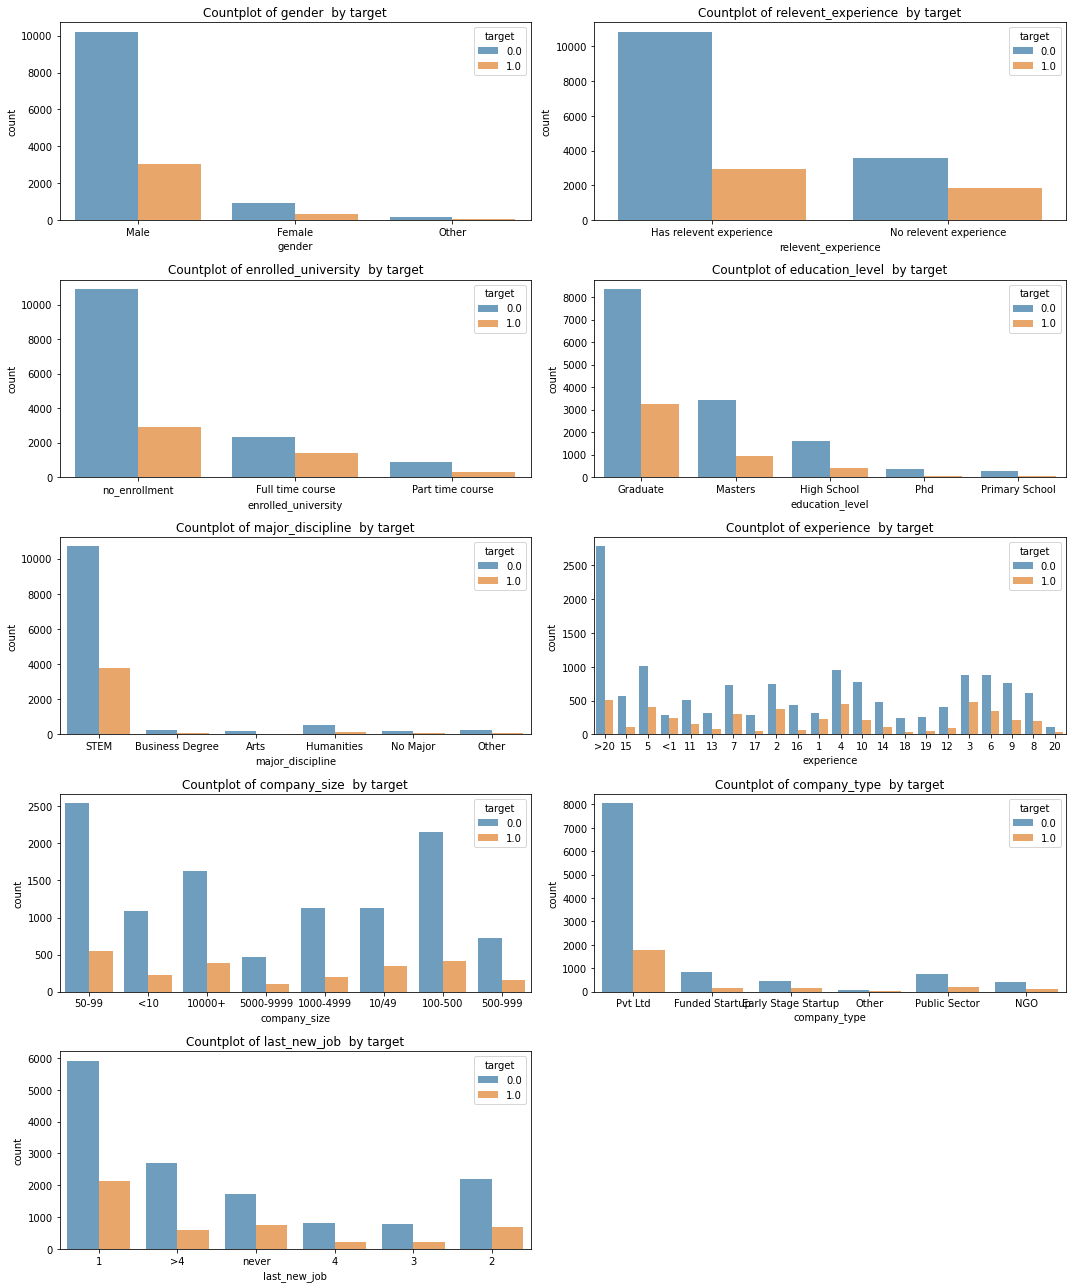

In [ ]:
#Frequency of each category separated by label
plt.figure(figsize=[15,18])
feafures = ['gender','relevent_experience','enrolled_university','education_level', 'major_discipline',
       'experience','company_size','company_type','last_new_job']
n=1
for f in feafures:
    plt.subplot(5,2,n)
    sns.countplot(x=f, hue='target', alpha=0.7, data=data)
    plt.title("Countplot of {}  by target".format(f))
    n=n+1
plt.tight_layout()
plt.show()

From these histogram charts, it can be seen, there is no special correlation between the variables with the target function to distinguish the value of the target. Furthermore, categorical variables cannot determine the correlation factor between these variables and the target function.

**II. Model fitting, prediction, recommendation and submission.**

> correlation can’t be calculated for categorical variables so dealing with them before was important.

We will start processing the categorical data by removing numerical columns and using map (str).



1. Data treatment : Check the dataset balance

In [ ]:
#Churn vs. normal 
counts = data.target.value_counts()
not_change = counts[0]
change = counts[1]
perc_not_change = (not_change/(not_change+change))*100
perc_change = (change/(not_change+change))*100
print('There were {} nonot_change ({:.3f}%) and {} change ({:.3f}%).'.format(not_change, perc_not_change, change, perc_change))

There were 14381 nonot_change (75.065%) and 4777 change (24.935%).


In [ ]:
np.array(data.columns[data.dtypes != object])

array(['enrollee_id', 'city_development_index', 'training_hours',
       'target'], dtype=object)

In [ ]:
import copy
df_train=copy.deepcopy(data)
df_test=copy.deepcopy(test)

cols=np.array(data.columns[data.dtypes != object])
for i in df_train.columns:
    if i not in cols:
        df_train[i]=df_train[i].map(str)
        df_test[i]=df_test[i].map(str)
df_train.drop(columns=cols,inplace=True)
df_test.drop(columns=np.delete(cols,len(cols)-1),inplace=True)

In [ ]:
df_train.columns

Index(['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job'],
      dtype='object')

We will assign each categorical variable value a number, so let’s say [A, B, A, F] named values will map to [1, 2, 1, 3]. To do that we will use LabelEncoder from sklearn.preprocessing package, as following

In [ ]:
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

# build dictionary function
cols=np.array(data.columns[data.dtypes != object])
d = defaultdict(LabelEncoder)

# only for categorical columns apply dictionary by calling fit_transform 
df_train = df_train.apply(lambda x: d[x.name].fit_transform(x))
df_test=df_test.apply(lambda x: d[x.name].transform(x))
df_train[cols]=data[cols]
df_test[np.delete(cols,len(cols)-1)]=test[np.delete(cols,len(cols)-1)]

Then we examine the results, considering the correlation between "pseudo categorical variables" and the "target" objective function.

In [ ]:
df_train.dtypes

city                        int64
gender                      int64
relevent_experience         int64
enrolled_university         int64
education_level             int64
major_discipline            int64
experience                  int64
company_size                int64
company_type                int64
last_new_job                int64
enrollee_id                 int64
city_development_index    float64
training_hours              int64
target                    float64
dtype: object

In [ ]:
df_test.columns

Index(['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job', 'enrollee_id', 'city_development_index',
       'training_hours'],
      dtype='object')

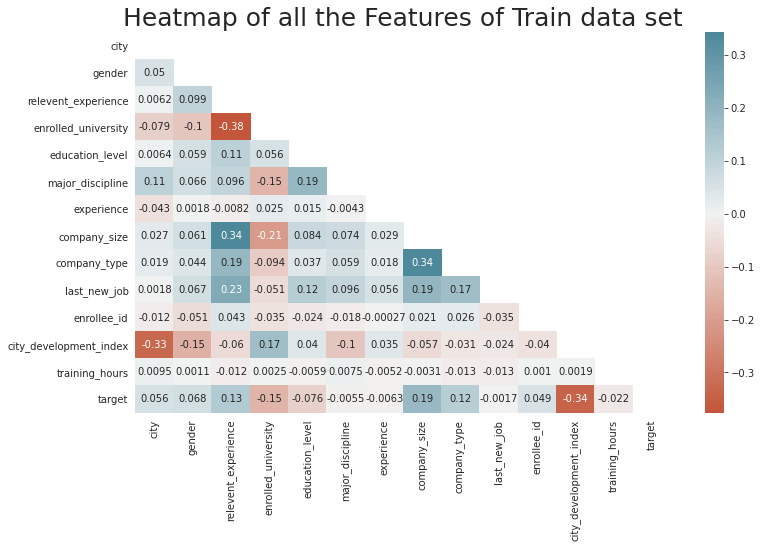

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (12,7))
## Plotting heatmap. # Generate a mask for the upper triangle.
mask = np.zeros_like(df_train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_train.corr(), cmap=sns.diverging_palette(20, 220, n=200), annot=True, mask=mask, center = 0, );
plt.title("Heatmap of all the Features of Train data set", fontsize = 25);


The results are not bad, but try to limit some of variables with low correlation results by setting limits, for example, we choose the correlation only if it’s above 0.01 or below -0.01

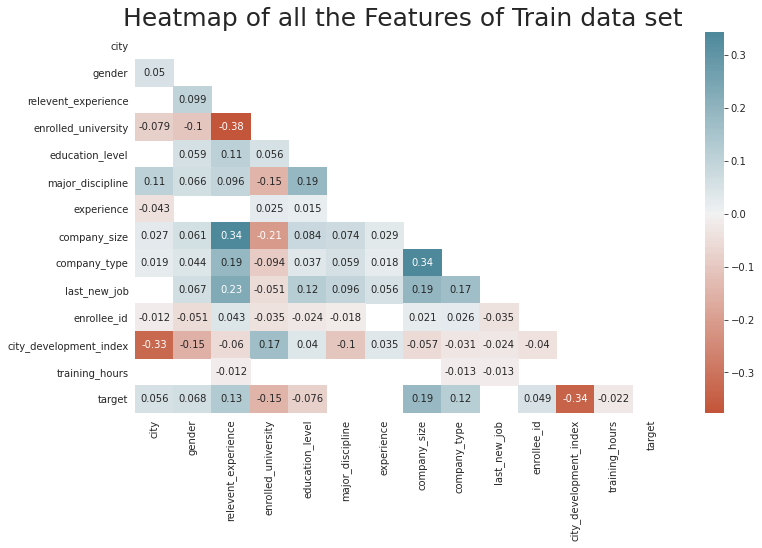

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (12,7))
## Plotting heatmap. # Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(df_train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

corr = df_train.corr()
sns.heatmap(corr[(corr.abs() > 0.01)], cmap=sns.diverging_palette(20, 220, n=200), annot=True, mask=mask, center = 0, );
plt.title("Heatmap of all the Features of Train data set", fontsize = 25);

From the above heatmap we can clearly observe that the target has a high dependance on the city_development_index which means candidates from city with higher amount of development index tends to move towards the field of data science.

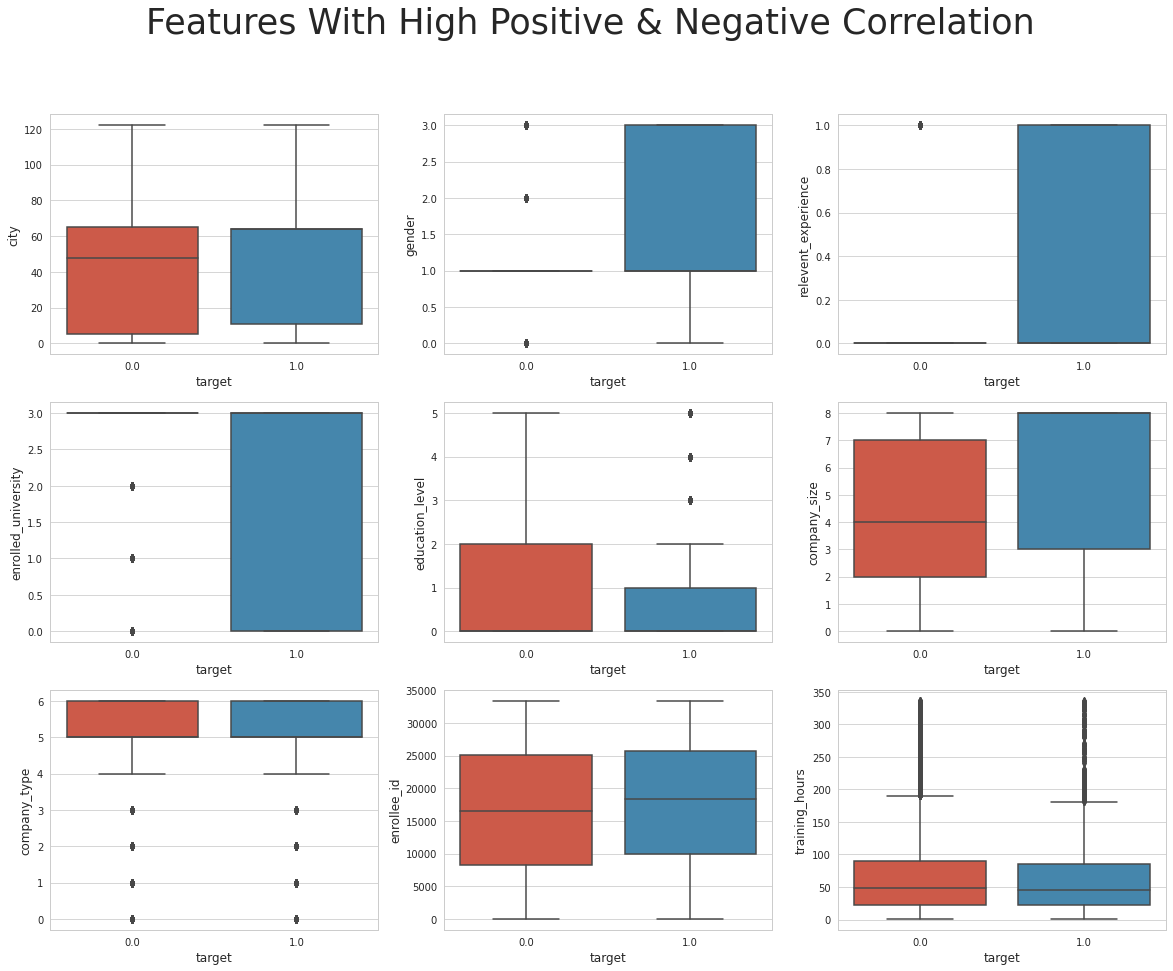

In [ ]:
#visualizing the features whigh positive and negative correlation
f, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,15))

f.suptitle('Features With High Positive & Negative Correlation', size=35)
sns.boxplot(x="target", y="city", data=df_train, ax=axes[0,0])
sns.boxplot(x="target", y="gender", data=df_train, ax=axes[0,1])
sns.boxplot(x="target", y='relevent_experience', data=df_train, ax=axes[0,2])
sns.boxplot(x="target", y='enrolled_university', data=df_train, ax=axes[1,0])
sns.boxplot(x="target", y='education_level', data=df_train, ax=axes[1,1])
sns.boxplot(x="target", y='company_size', data=df_train, ax=axes[1,2])
sns.boxplot(x="target", y='company_type', data=df_train, ax=axes[2,0])
sns.boxplot(x="target", y='enrollee_id', data=df_train, ax=axes[2,1])
sns.boxplot(x="target", y='training_hours', data=df_train, ax=axes[2,2])


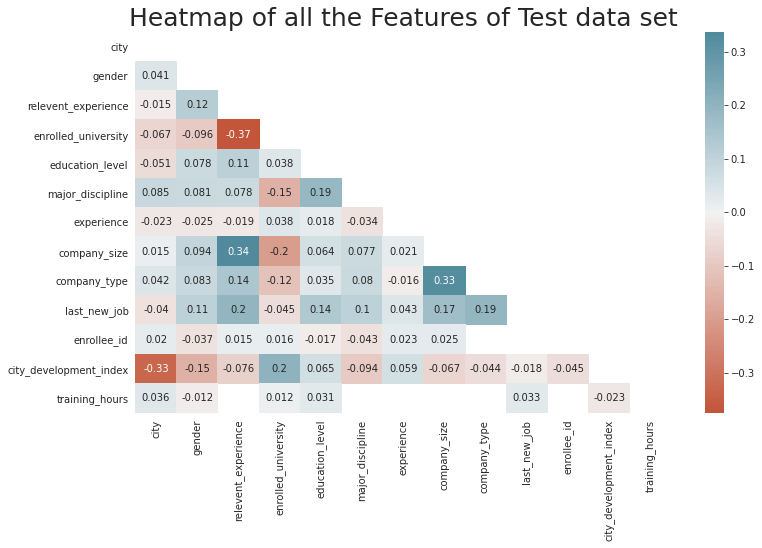

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (12,7))
## Plotting heatmap. # Generate a mask for the upper triangle 
mask = np.zeros_like(df_test.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

corr = df_test.corr()
sns.heatmap(corr[(corr.abs() > 0.01)], cmap=sns.diverging_palette(20, 220, n=200), annot=True, mask=mask, center = 0, );
plt.title("Heatmap of all the Features of Test data set", fontsize = 25);


Thus, the correlation between the variables in the Dataset and Testdata is nearly the same, good predictive results could be expected if a good train result is obtained.

In [ ]:
df_train['target'].value_counts()

0.0    14381
1.0     4777
Name: target, dtype: int64

From this we can clearly see that the target 0 is in majority which will effect our model so we will use SMOTE (Synthetic Minority Over-sampling Technique) which will help us to create more synthetic data for the minority class 1 :)

2. Deal with Imbalanced Data using SMOTE

In [ ]:
df_train.columns


Index(['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job', 'enrollee_id', 'city_development_index',
       'training_hours', 'target'],
      dtype='object')

In [ ]:
ftrain = ['city','gender', 'relevent_experience','enrolled_university','education_level','company_size','company_type','city_development_index', 'training_hours', 'target']
ftest = ['city','gender', 'relevent_experience','enrolled_university','education_level','company_size','company_type','city_development_index', 'training_hours']

def Definedata():
    # define dataset
    data2=df_train[ftrain]
    X=data2.drop(columns=['target']).values
    y=data2['target'].values
    return X, y

In [ ]:
def SMOTE():
    # borderline-SMOTE for imbalanced dataset
    from collections import Counter
    from sklearn.model_selection import train_test_split
    from sklearn.datasets import make_classification
    from imblearn.over_sampling import SMOTE
    from matplotlib import pyplot
    from numpy import where
    
    X, y = Definedata()

# summarize class distribution
    counter = Counter(y)
    print(counter)
# transform the dataset
    smt = SMOTE(random_state=0)
    X, y = smt.fit_sample(X, y) 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2)
# summarize the new class distribution
    counter = Counter(y)
    print(counter)
# scatter plot of examples by class label
    for label, _ in counter.items():
        row_ix = where(y == label)[0]
        pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
    pyplot.legend()
    pyplot.show()
    return X_train, X_test, y_train, y_test

Borderline-SMOTE: A New Over-Sampling Method in Imbalanced Data Sets Learning, 2005.

We can implement the BorderlineSMOTE class from imbalanced-learn as following.

In [ ]:
def BSMOTE():
    from collections import Counter
    from sklearn.model_selection import train_test_split
    from imblearn.over_sampling import BorderlineSMOTE
    from matplotlib import pyplot
    from numpy import where
    
    X, y = Definedata()
    
# summarize class distribution
    counter = Counter(y)
    print(counter)
# transform the dataset
    X, y = BorderlineSMOTE().fit_resample(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2)
# summarize the new class distribution
    counter = Counter(y)
    print(counter)
# scatter plot of examples by class label
    for label, _ in counter.items():
        row_ix = where(y == label)[0]
        pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
    pyplot.legend()
    pyplot.show()
    return X_train, X_test, y_train, y_test


Borderline-SMOTE SVM

Hien Nguyen, et al. suggest using an alternative of Borderline-SMOTE where an SVM algorithm is used instead of a KNN to identify misclassified examples on the decision boundary.

Their approach is summarized in the 2009 paper titled “Borderline Over-sampling For Imbalanced Data Classification.” An SVM is used to locate the decision boundary defined by the support vectors and examples in the minority class that close to the support vectors become the focus for generating synthetic examples

In [ ]:
def SMOTESVM():
    from collections import Counter
    from sklearn.model_selection import train_test_split
    from imblearn.over_sampling import SVMSMOTE
    from matplotlib import pyplot
    from numpy import where

    X, y = Definedata()

# summarize class distribution
    counter = Counter(y)
    print(counter)
# transform the dataset
    X, y = SVMSMOTE().fit_resample(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2)
# summarize the new class distribution
    counter = Counter(y)
    print(counter)
# scatter plot of examples by class label
    for label, _ in counter.items():
        row_ix = where(y == label)[0]
        pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
    pyplot.legend()
    pyplot.show()
    return X_train, X_test, y_train, y_test


Adaptive Synthetic Sampling (ADASYN) Another approach involves generating synthetic samples inversely proportional to the density of the examples in the minority class.

That is, generate more synthetic examples in regions of the feature space where the density of minority examples is low, and fewer or none where the density is high.

This modification to SMOTE is referred to as the Adaptive Synthetic Sampling Method, or ADASYN, and was proposed to Haibo He, et al. in their 2008 paper named for the method titled “ADASYN: Adaptive Synthetic Sampling Approach For Imbalanced Learning.”

In [ ]:
def ADASYN():
    from collections import Counter
    from sklearn.model_selection import train_test_split
    from imblearn.over_sampling import ADASYN
    from matplotlib import pyplot
    from numpy import where

    X, y = Definedata()

# summarize class distribution
    counter = Counter(y)
    print(counter)
# transform the dataset
    X, y = ADASYN().fit_resample(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2)
# summarize the new class distribution
    counter = Counter(y)
    print(counter)
# scatter plot of examples by class label
    for label, _ in counter.items():
        row_ix = where(y == label)[0]
        pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
    pyplot.legend()
    pyplot.show()
    return X_train, X_test, y_train, y_test


3. Machine Learning Algorithms

Broadly, there are 3 types of Machine Learning Algorithms

(A) Supervised Learning

This algorithm consist of a target / outcome variable (or dependent variable) which is to be predicted from a given set of predictors (independent variables). Using these set of variables, we generate a function that map inputs to desired outputs. The training process continues until the model achieves a desired level of accuracy on the training data. Examples of Supervised Learning: Regression, Decision Tree, Random Forest, KNN, Logistic Regression etc.

(B) Unsupervised Learning

In this algorithm, we do not have any target or outcome variable to predict / estimate. It is used for clustering population in different groups, which is widely used for segmenting customers in different groups for specific intervention. Examples of Unsupervised Learning are Apriori algorithm, K-means, ...

(C) Reinforcement Learning:

Using this algorithm, the machine is trained to make specific decisions. It works this way: the machine is exposed to an environment where it trains itself continually using trial and error. This machine learns from past experience and tries to capture the best possible knowledge to make accurate business decisions. Example of Reinforcement Learning such as Markov Decision Process.

In this Notebook, we will apply some commonly used machine learning algorithms, these algorithms can be applied to almost any data problem.

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix

import seaborn 
import matplotlib.pyplot as plt

def Models(models, X_train, X_test, y_train, y_test, title):
    model = models
    model.fit(X_train,y_train)
    
    X, y = Definedata()
    train_matrix = pd.crosstab(y_train, model.predict(X_train), rownames=['Actual'], colnames=['Predicted'])    
    test_matrix = pd.crosstab(y_test, model.predict(X_test), rownames=['Actual'], colnames=['Predicted'])
    matrix = pd.crosstab(y, model.predict(X), rownames=['Actual'], colnames=['Predicted'])
    
    f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True, figsize=(20, 3))
    g1 = sns.heatmap(train_matrix, annot=True, fmt=".1f", cbar=False,annot_kws={"size": 18},ax=ax1)
    g1.set_title(title)
    g1.set_ylabel('Total career swith = {}'.format(y_train.sum()), fontsize=14, rotation=90)
    g1.set_xlabel('Accuracy score Trainset: {}'.format(accuracy_score(model.predict(X_train), y_train)))
    g2 = sns.heatmap(test_matrix, annot=True, fmt=".1f",cbar=False,annot_kws={"size": 18},ax=ax2)
    g2.set_ylabel('Total career swith = {}'.format(y_test.sum()), fontsize=14, rotation=90)
    g2.set_xlabel('Accuracy score Testingset: {}'.format(accuracy_score(model.predict(X_test), y_test)))
    g3 = sns.heatmap(matrix, annot=True, fmt=".1f",cbar=False,annot_kws={"size": 18},ax=ax3)
    g3.set_ylabel('Total career swith = {}'.format(y.sum()), fontsize=14, rotation=90)
    g3.set_xlabel('Accuracy score Totalset: {}'.format(accuracy_score(model.predict(X), y)))
    
    plt.show()
    return y, model.predict(X)

def Featureimportances(models):
    model = models
    model.fit(X_train1,y_train1)
    importances = model.feature_importances_
    features = df_test.columns[:9]
    imp = pd.DataFrame({'Features': ftest, 'Importance': importances})
    imp['Sum Importance'] = imp['Importance'].cumsum()
    imp = imp.sort_values(by = 'Importance')
    return imp


Counter({0.0: 14381, 1.0: 4777})
Counter({1.0: 14381, 0.0: 14381})


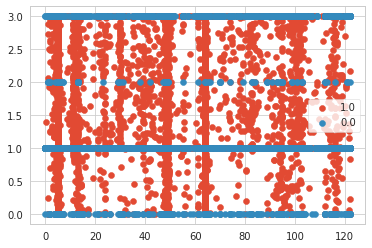

Counter({0.0: 14381, 1.0: 4777})
Counter({1.0: 14381, 0.0: 14381})


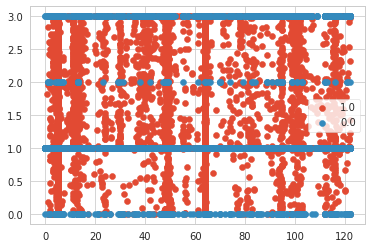

Counter({0.0: 14381, 1.0: 4777})
Counter({1.0: 14381, 0.0: 14381})


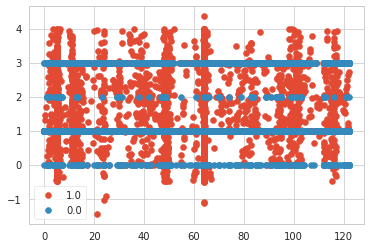

Counter({0.0: 14381, 1.0: 4777})
Counter({0.0: 14381, 1.0: 14236})


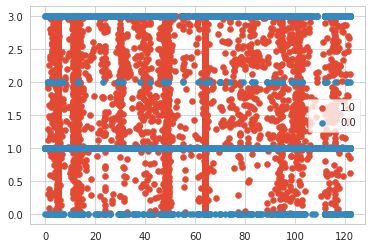

In [ ]:
X_train1, X_test1, y_train1, y_test1 = SMOTE()
X_train2, X_test2, y_train2, y_test2 = BSMOTE()
X_train3, X_test3, y_train3, y_test3 = SMOTESVM()
X_train4, X_test4, y_train4, y_test4 = ADASYN()

A. Logistic Regression
It is a classification not a regression algorithm. It is used to estimate discrete values (Binary values like 0/1, yes/no, true/false) based on given set of independent variable(s). In simple words, it predicts the probability of occurrence of an event by fitting data to a logit function. Hence, it is also known as logit regression. Since, it predicts the probability, its output values lies between 0 and 1 (as expected).

Logistic regression is a fundamental classification technique. It belongs to the group of linear classifiers and is somewhat similar to polynomial and linear regression. Logistic regression is fast and relatively uncomplicated, and it’s convenient for you to interpret the results. Although it’s essentially a method for binary classification, it can also be applied to multiclass problems.

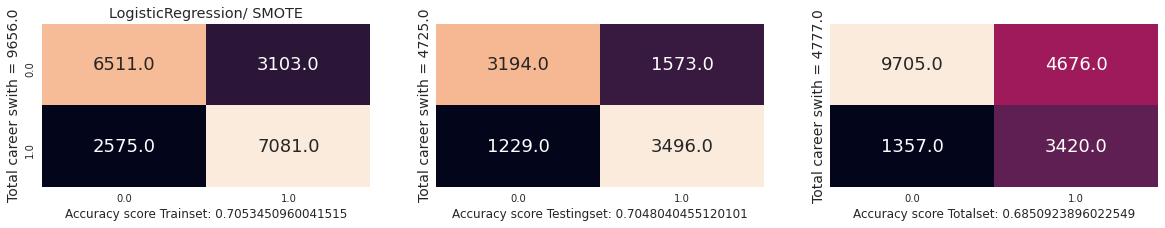

(array([1., 0., 0., ..., 0., 0., 0.]), array([1., 1., 1., ..., 0., 0., 1.]))

In [ ]:
title = "LogisticRegression/ SMOTE" 
Models(LogisticRegression(),X_train1, X_test1, y_train1, y_test1, title)

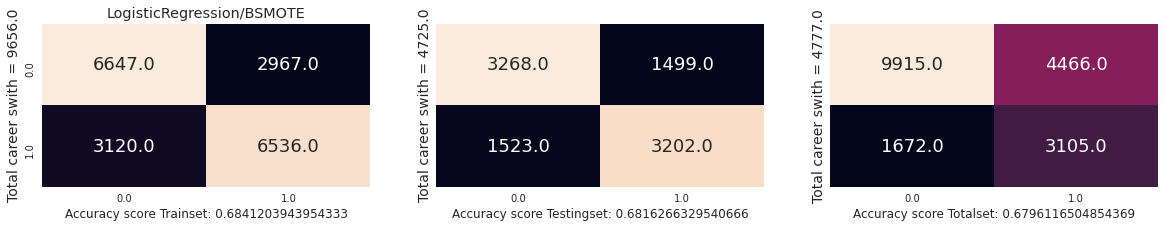

(array([1., 0., 0., ..., 0., 0., 0.]), array([1., 1., 1., ..., 0., 0., 1.]))

In [ ]:
title = "LogisticRegression/BSMOTE"
Models(LogisticRegression(),X_train2, X_test2, y_train2, y_test2, title)

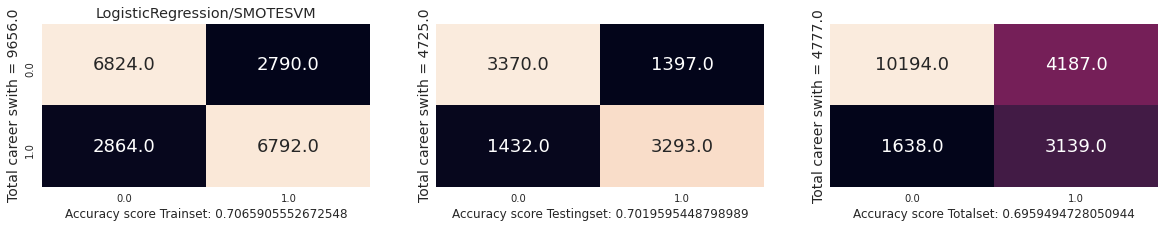

(array([1., 0., 0., ..., 0., 0., 0.]), array([1., 1., 1., ..., 0., 0., 0.]))

In [ ]:
title = "LogisticRegression/SMOTESVM"
Models(LogisticRegression(),X_train3, X_test3, y_train3, y_test3, title)

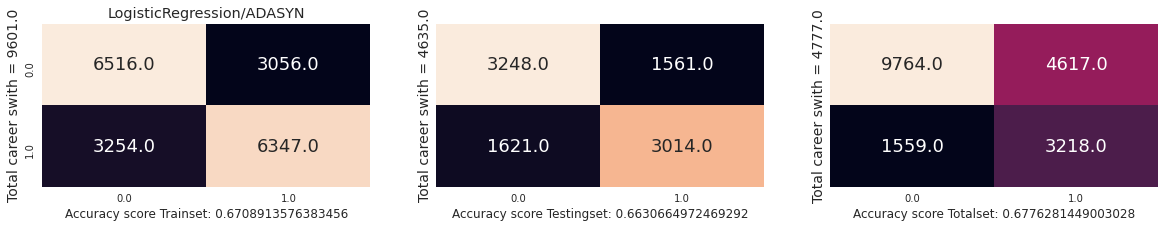

(array([1., 0., 0., ..., 0., 0., 0.]), array([1., 1., 1., ..., 0., 0., 1.]))

In [ ]:
title = "LogisticRegression/ADASYN"
Models(LogisticRegression(),X_train4, X_test4, y_train4, y_test4, title)

B. Naive Bayes - Gaussian Naive Bayes
It is a classification technique based on Bayes’ theorem with an assumption of independence between predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature. For example, a fruit may be considered to be an apple if it is red, round, and about 3 inches in diameter. Even if these features depend on each other or upon the existence of the other features, a naive Bayes classifier would consider all of these properties to independently contribute to the probability that this fruit is an apple.

Naive Bayesian model is easy to build and particularly useful for very large data sets. Along with simplicity, Naive Bayes is known to outperform even highly sophisticated classification methods.

Naive Bayes models are a group of extremely fast and simple classification algorithms that are often suitable for very high-dimensional datasets. Because they are so fast and have so few tunable parameters, they end up being very useful as a quick-and-dirty baseline for a classification problem. That said, they have several advantages.

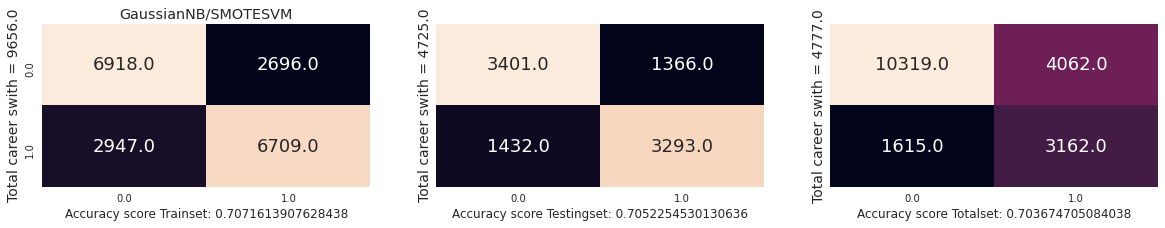

(array([1., 0., 0., ..., 0., 0., 0.]), array([0., 1., 1., ..., 0., 0., 0.]))

In [ ]:
title = "GaussianNB/SMOTESVM"
Models(GaussianNB(),X_train3, X_test3, y_train3, y_test3, title)

C. kNN (k- Nearest Neighbors)
It can be used for both classification and regression problems. However, it is more widely used in classification problems in the industry. K nearest neighbors is a simple algorithm that stores all available cases and classifies new cases by a majority vote of its k neighbors. The case being assigned to the class is most common amongst its K nearest neighbors measured by a distance function.

K Nearest Neighbor(KNN) is a very simple, easy to understand, versatile and one of the topmost machine learning algorithms. KNN used in the variety of applications such as finance, healthcare, political science, handwriting detection, image recognition and video recognition. In Credit ratings, financial institutes will predict the credit rating of customers. In loan disbursement, banking institutes will predict whether the loan is safe or risky. In political science, classifying potential voters in two classes will vote or won’t vote. KNN algorithm used for both classification and regression problems. KNN algorithm based on feature similarity approach.

However, KNN is computationally expensive. Variables should be normalized else higher range variables can bias it. For better results, normalizing data on the same scale is highly recommended. Generally, the normalization range considered between 0 and 1. KNN is not suitable for the large dimensional data. In such cases, dimension needs to reduce to improve the performance. Also, handling missing values will help us in improving results.

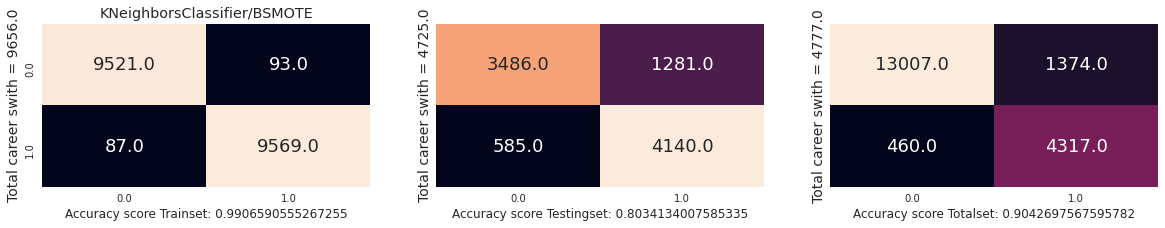

(array([1., 0., 0., ..., 0., 0., 0.]), array([0., 0., 1., ..., 0., 0., 0.]))

In [ ]:
title = "KNeighborsClassifier/BSMOTE"
Models(KNeighborsClassifier(n_neighbors=1),X_train2, X_test2, y_train2, y_test2, title)

D. Decision Tree
This is a type of supervised learning algorithm that is mostly used for classification problems. Surprisingly, it works for both categorical and continuous dependent variables. In this algorithm, we split the population into two or more homogeneous sets. This is done based on most significant attributes/ independent variables to make as distinct groups as possible. A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in recursively manner call recursive partitioning. This flowchart-like structure helps you in decision making. It's visualization like a flowchart diagram which easily mimics the human level thinking. That is why decision trees are easy to understand and interpret.

Decision Tree is a white box type of ML algorithm. It shares internal decision-making logic, which is not available in the black box type of algorithms such as Neural Network. Its training time is faster compared to the neural network algorithm. The time complexity of decision trees is a function of the number of records and number of attributes in the given data. The decision tree is a distribution-free or non-parametric method, which does not depend upon probability distribution assumptions. Decision trees can handle high dimensional data with good accuracy.

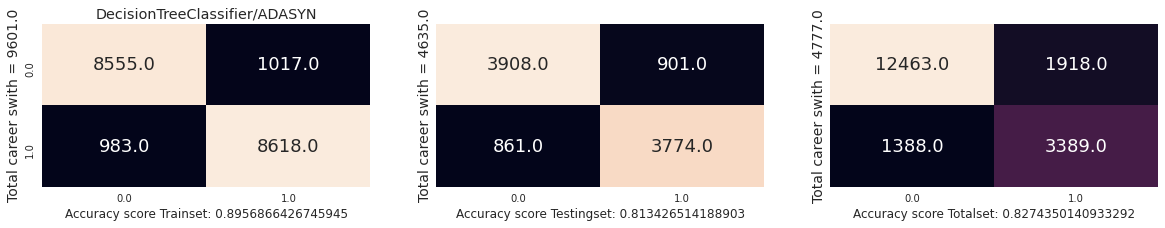

(array([1., 0., 0., ..., 0., 0., 0.]), array([1., 0., 1., ..., 0., 0., 0.]))

In [ ]:
title = "DecisionTreeClassifier/ADASYN"
Models(DecisionTreeClassifier(max_depth=14),X_train4, X_test4, y_train4, y_test4, title)

in fact, with a result of 81.6% this is the level of accuracy expected for a simple, fast method

In [ ]:
Featureimportances(DecisionTreeClassifier(max_depth=14))

,Features,Importance,Sum Importance
3,enrolled_university,0.024272,0.205203
0,city,0.038161,0.038161
1,gender,0.045269,0.083430
5,company_size,0.075821,0.404551
2,relevent_experience,0.097501,0.180931
8,training_hours,0.102669,1.000000
4,education_level,0.123527,0.328731
6,company_type,0.245530,0.650082
7,city_development_index,0.247249,0.897331


E. Random Forest
Random Forest is a trademark term for an ensemble of decision trees. In Random Forest, we’ve collection of decision trees (so known as “Forest”). To classify a new object based on attributes, each tree gives a classification and we say the tree “votes” for that class. The forest chooses the classification having the most votes (over all the trees in the forest).

Random forest is a type of supervised machine learning algorithm based on ensemble learning. Ensemble learning is a type of learning where you join different types of algorithms or same algorithm multiple times to form a more powerful prediction model. The random forest algorithm combines multiple algorithm of the same type i.e. multiple decision trees, resulting in a forest of trees, hence the name "Random Forest". The random forest algorithm can be used for both regression and classification tasks.

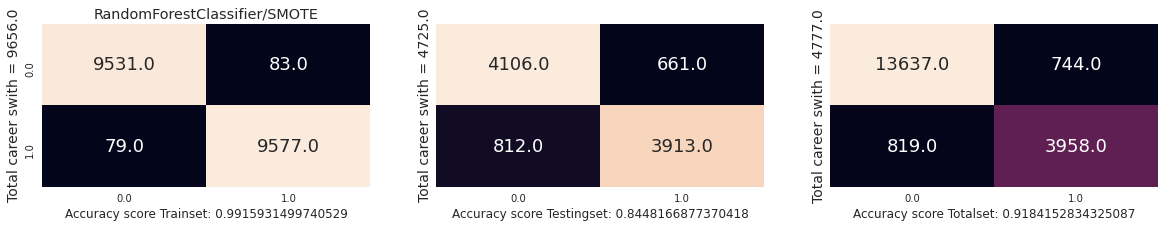

(array([1., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]))

In [ ]:
title = "RandomForestClassifier/SMOTE"
Models(RandomForestClassifier(n_estimators=2000,max_depth=200,max_features=7),X_train1, X_test1, y_train1, y_test1, title)

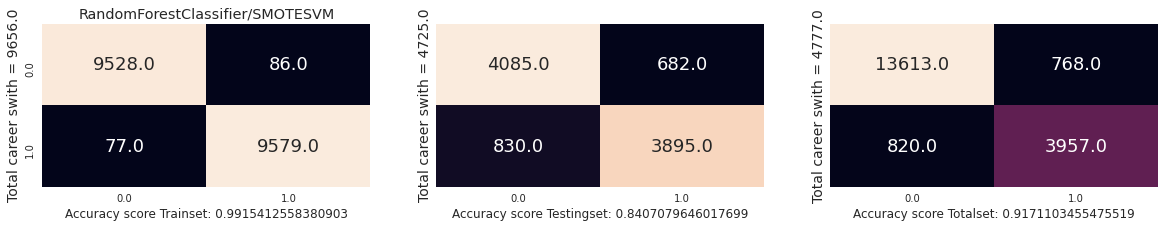

(array([1., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]))

In [ ]:
title = "RandomForestClassifier/SMOTESVM"
Models(RandomForestClassifier(),X_train3, X_test3, y_train3, y_test3, title)

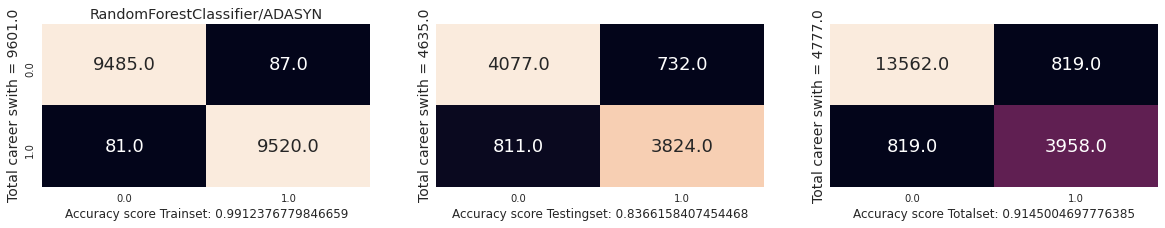

(array([1., 0., 0., ..., 0., 0., 0.]), array([0., 0., 1., ..., 0., 0., 0.]))

In [ ]:
title = "RandomForestClassifier/ADASYN"
Models(RandomForestClassifier(),X_train4, X_test4, y_train4, y_test4, title)

In [ ]:
Featureimportances(RandomForestClassifier())

,Features,Importance,Sum Importance
3,enrolled_university,0.052088,0.271795
1,gender,0.052096,0.145046
2,relevent_experience,0.074662,0.219708
4,education_level,0.091689,0.363484
0,city,0.092950,0.092950
6,company_type,0.098587,0.574552
5,company_size,0.112480,0.475965
7,city_development_index,0.195198,0.769750
8,training_hours,0.230250,1.000000


As with any algorithm, there are advantages and disadvantages to using it.

The random forest algorithm is not biased, since, there are multiple trees and each tree is trained on a subset of data. Basically, the random forest algorithm relies on the power of "the crowd"; therefore the overall biasedness of the algorithm is reduced.

This algorithm is very stable. Even if a new data point is introduced in the dataset the overall algorithm is not affected much since new data may impact one tree, but it is very hard for it to impact all the trees. The random forest algorithm works well when you have both categorical and numerical features. The random forest algorithm also works well when data has missing values or it has not been scaled well.

However, a major disadvantage of random forests lies in their complexity. They required much more computational resources, owing to the large number of decision trees joined together. Due to their complexity, they require much more time to train than other comparable algorithms.

F. Extra Trees Algorithm
Extremely Randomized Trees, or Extra Trees for short, is an ensemble machine learning algorithm.

Specifically, it is an ensemble of decision trees and is related to other ensembles of decision trees algorithms such as bootstrap aggregation (bagging) and random forest.

The Extra Trees algorithm works by creating a large number of unpruned decision trees from the training dataset. Predictions are made by averaging the prediction of the decision trees in the case of regression or using majority voting in the case of classification.

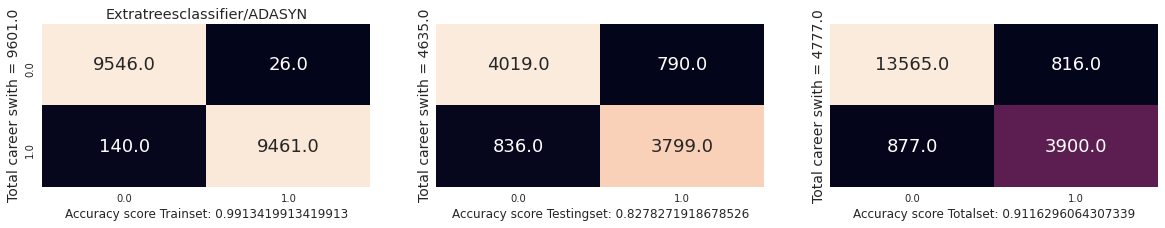

(array([1., 0., 0., ..., 0., 0., 0.]), array([0., 0., 1., ..., 0., 0., 0.]))

In [ ]:
title = "Extratreesclassifier/ADASYN"
Models(ExtraTreesClassifier(),X_train4, X_test4, y_train4, y_test4, title)

G. Gradient Boosting Algorithms
GBM is a boosting algorithm used when we deal with plenty of data to make a prediction with high prediction power. Boosting is actually an ensemble of learning algorithms which combines the prediction of several base estimators in order to improve robustness over a single estimator. It combines multiple weak or average predictors to a build strong predictor. These boosting algorithms always work well in data science competitions like Kaggle, AV Hackathon, CrowdAnalytix.

Gradient boosting models are powerful algorithms which can be used for both classification and regression tasks. Gradient boosting models can perform incredibly well on very complex datasets, but they are also prone to overfitting, which can be combated with several of the methods described above. Gradient boosting classifiers are also easy to implement in Scikit-Learn.

Gradient boosting models are becoming popular because of their effectiveness at classifying complex datasets, and have recently been used to win many Kaggle data science competitions.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# Now we can try setting different learning rates, so that we can compare the performance of the classifier's 
#performance at different learning rates. Let's see what the performance was for different learning rates:

lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=50, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train1, y_train1)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train1, y_train1)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test1, y_test1)))


Learning rate:  0.05
Accuracy score (training): 0.773
Accuracy score (validation): 0.777
Learning rate:  0.075
Accuracy score (training): 0.786
Accuracy score (validation): 0.788
Learning rate:  0.1
Accuracy score (training): 0.800
Accuracy score (validation): 0.799
Learning rate:  0.25
Accuracy score (training): 0.818
Accuracy score (validation): 0.816
Learning rate:  0.5
Accuracy score (training): 0.837
Accuracy score (validation): 0.839
Learning rate:  0.75
Accuracy score (training): 0.845
Accuracy score (validation): 0.844
Learning rate:  1
Accuracy score (training): 0.852
Accuracy score (validation): 0.850


We're mainly interested in the classifier's accuracy on the validation set, but it looks like a learning rate of 0.5 gives us the best performance on the validation set and good performance on the training set.

Now we can evaluate the classifier by checking its accuracy and creating a confusion matrix. Let's create a new classifier and specify the best learning rate we discovered.

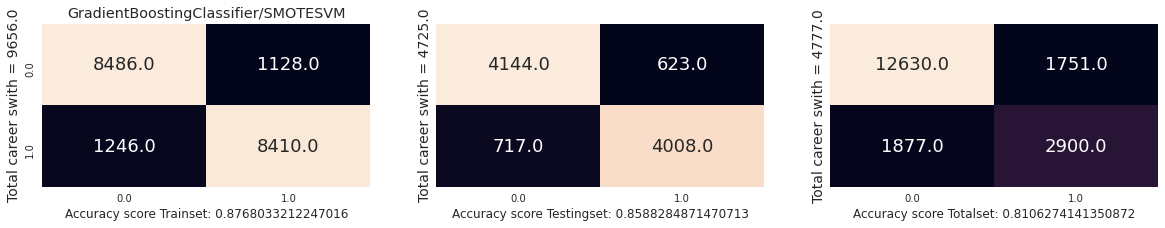

(array([1., 0., 0., ..., 0., 0., 0.]), array([1., 0., 1., ..., 0., 0., 0.]))

In [ ]:
title = "GradientBoostingClassifier/SMOTESVM"
Models(GradientBoostingClassifier(n_estimators=500, learning_rate=1, max_features=2, max_depth=2, random_state=0),X_train3, X_test3, y_train3, y_test3, title)

In [ ]:
Featureimportances(GradientBoostingClassifier(n_estimators=500, learning_rate=1, max_features=2, max_depth=2, random_state=0))

,Features,Importance,Sum Importance
8,training_hours,0.022582,1.000000
3,enrolled_university,0.048437,0.447164
5,company_size,0.058092,0.633369
1,gender,0.106149,0.216118
0,city,0.109970,0.109970
4,education_level,0.128113,0.575277
6,company_type,0.163526,0.796895
7,city_development_index,0.180523,0.977418
2,relevent_experience,0.182609,0.398727


H. XGBoost

XGBoost is one of the most popular machine learning algorithm these days. Regardless of the type of prediction task at hand; regression or classification. The XGBoost has an immensely high predictive power which makes it the best choice for accuracy in events as it possesses both linear model and the tree learning algorithm, making the algorithm almost 10x faster than existing gradient booster techniques. The support includes various objective functions, including regression, classification and ranking.

One of the most interesting things about the XGBoost is that it is also called a regularized boosting technique. This helps to reduce overfit modelling and has a massive support for a range of languages such as Scala, Java, R, Python, Julia and C++.

XGBoost is well known to provide better solutions than other machine learning algorithms. In fact, since its inception, it has become the "state-of-the-art” machine learning algorithm to deal with structured data.

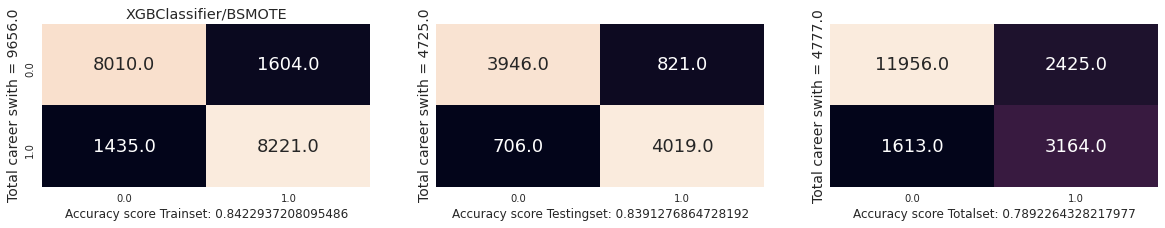

(array([1., 0., 0., ..., 0., 0., 0.]), array([1., 0., 1., ..., 0., 0., 0.]))

In [ ]:
title = "XGBClassifier/BSMOTE"
Models(XGBClassifier(),X_train2, X_test2, y_train2, y_test2, title)

In [ ]:
Featureimportances(XGBClassifier())

,Features,Importance,Sum Importance
8,training_hours,0.012072,1.000000
0,city,0.033062,0.033062
5,company_size,0.098770,0.655584
3,enrolled_university,0.113227,0.443487
4,education_level,0.113327,0.556814
1,gender,0.125142,0.158204
6,company_type,0.161301,0.816885
7,city_development_index,0.171043,0.987928
2,relevent_experience,0.172056,0.330260


I. LightGBM
LightGBM is a gradient boosting framework that uses tree based learning algorithms.Also, it is surprisingly very fast, hence the word ‘Light’.

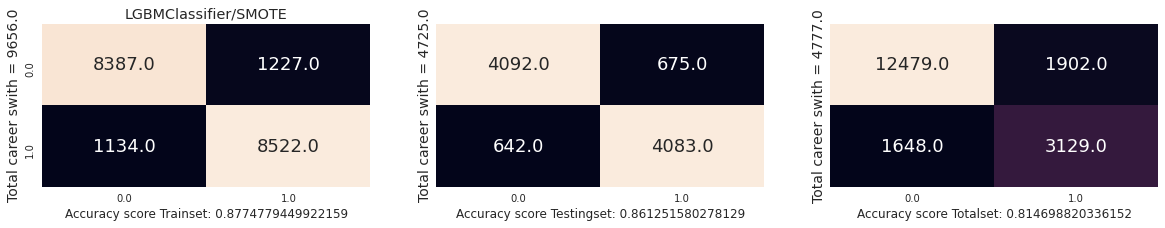

(array([1., 0., 0., ..., 0., 0., 0.]), array([1., 0., 1., ..., 0., 0., 0.]))

In [ ]:
title = "LGBMClassifier/SMOTE"
Models(LGBMClassifier(),X_train1, X_test1, y_train1, y_test1, title)

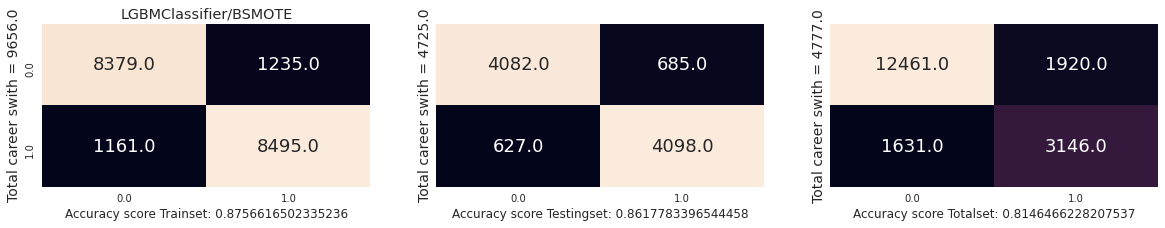

(array([1., 0., 0., ..., 0., 0., 0.]), array([1., 0., 1., ..., 0., 0., 0.]))

In [ ]:
title = "LGBMClassifier/BSMOTE"
Models(LGBMClassifier(),X_train2, X_test2, y_train2, y_test2, title)

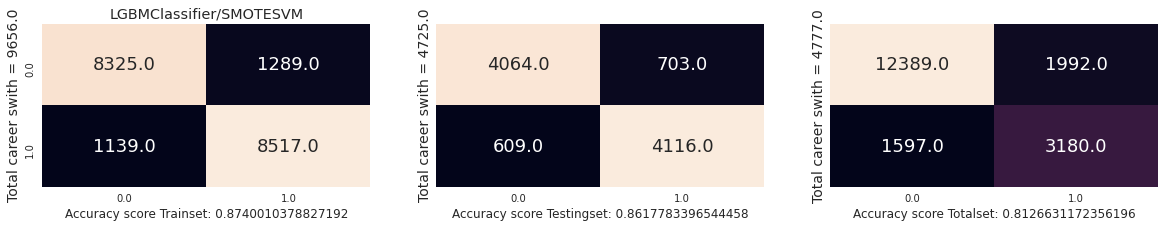

(array([1., 0., 0., ..., 0., 0., 0.]), array([1., 0., 1., ..., 0., 0., 0.]))

In [ ]:
title = "LGBMClassifier/SMOTESVM"
Models(LGBMClassifier(),X_train3, X_test3, y_train3, y_test3, title)

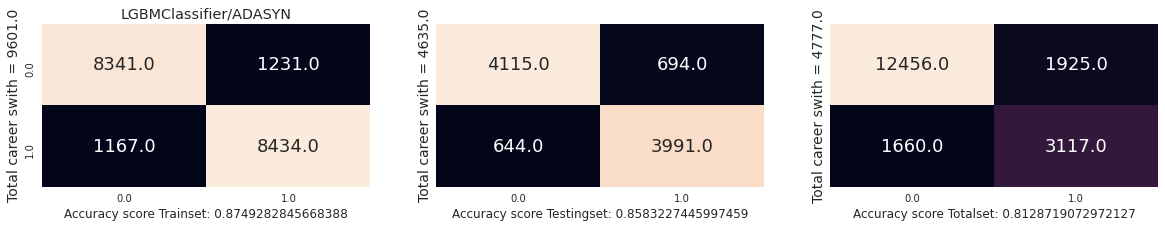

(array([1., 0., 0., ..., 0., 0., 0.]), array([1., 0., 1., ..., 0., 0., 0.]))

In [ ]:
title = "LGBMClassifier/ADASYN"
Models(LGBMClassifier(),X_train4, X_test4, y_train4, y_test4, title)

In [ ]:
Featureimportances(LGBMClassifier())

,Features,Importance,Sum Importance
2,relevent_experience,129,780
3,enrolled_university,174,954
1,gender,246,651
6,company_type,311,2004
7,city_development_index,314,2318
4,education_level,326,1280
0,city,405,405
5,company_size,413,1693
8,training_hours,682,3000


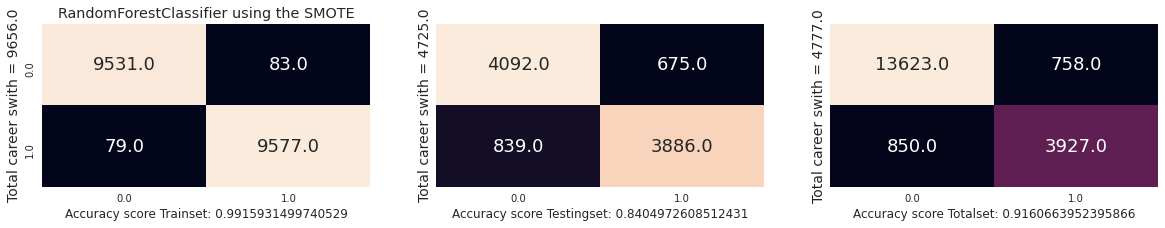

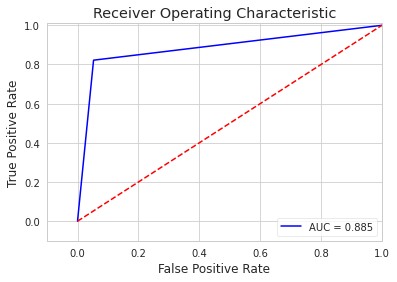

In [ ]:
from sklearn.metrics import confusion_matrix,auc,roc_curve

title = 'RandomForestClassifier using the SMOTE'
y, ypred =  Models(RandomForestClassifier(),X_train1, X_test1, y_train1, y_test1, title)

fpr, tpr, thresholds = roc_curve(y, ypred)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

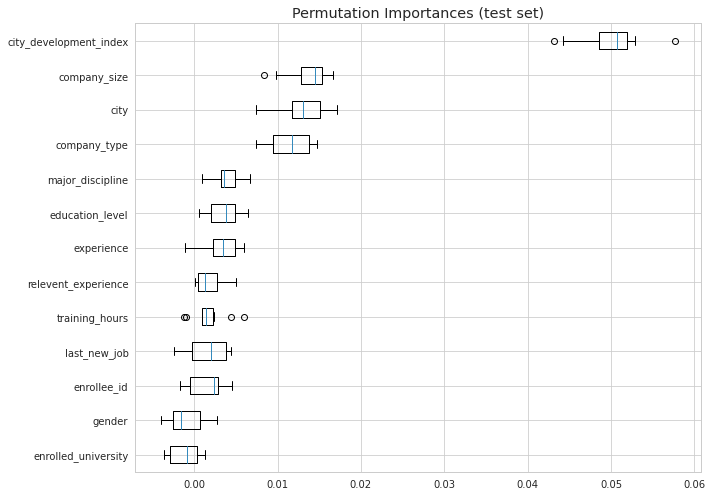

In [ ]:
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix,auc,roc_curve
from sklearn.model_selection import train_test_split

X=df_train.drop(columns=['target'])
y=df_train['target'].values
model = RandomForestClassifier()
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 25)
model.fit(X_train,y_train)    
resultmymodel = permutation_importance(model, X_test, y_test, n_repeats=10,random_state=42, n_jobs=2)
sorted_idx = resultmymodel.importances_mean.argsort()

fig, ax = plt.subplots(figsize=(10,7))
ax.boxplot(resultmymodel.importances[sorted_idx].T,vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()


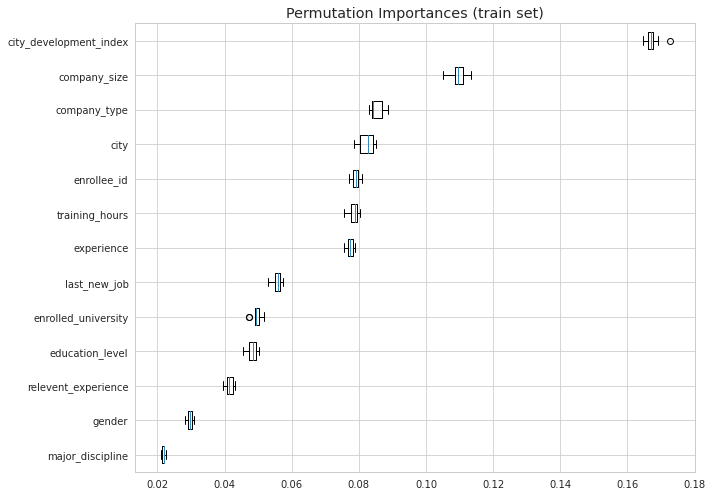

In [ ]:
resultmymodel = permutation_importance(model, X_train, y_train, n_repeats=10,random_state=42, n_jobs=2)
sorted_idx = resultmymodel.importances_mean.argsort()

fig, ax = plt.subplots(figsize=(10,7))
ax.boxplot(resultmymodel.importances[sorted_idx].T,vert=False, labels=X_train.columns[sorted_idx])
ax.set_title("Permutation Importances (train set)")
fig.tight_layout()
plt.show()

Counter({0.0: 14381, 1.0: 4777})
Counter({1.0: 14381, 0.0: 14381})


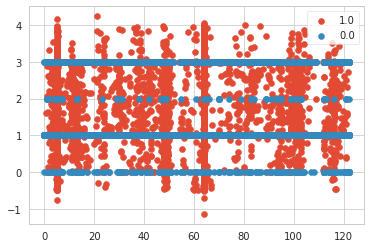

0.0    1639
1.0     490
Name: target, dtype: int64


In [ ]:
ftest0 = ['enrollee_id','city','gender', 'relevent_experience','enrolled_university','education_level','company_size','company_type','city_development_index', 'training_hours']
test = df_test[ftest0].copy()
df_test = df_test[ftest].copy()

X_train, X_test, y_train, y_test = SMOTESVM()

model = RandomForestClassifier()
model.fit(X_train,y_train)
predictions=model.predict(df_test[ftest].values)
submission = pd.DataFrame({'enrollee_id':test['enrollee_id'],'target':predictions})
submission['enrollee_id']=test['enrollee_id']

submission['target']=model.predict(df_test.values)

print(submission.target.value_counts())

In [ ]:
#submission.head(20)